# Dynamic programming

Dynamic programming is similar to the divide and conquer approach except that the subproblems overlap i.e. the subproblems share the same subsubproblems. This method of solving problems typically is used in optimization problems, particularly optimal control problems, and was originally developed by Richard E. Bellman who is also famous for developing the closely related Bellman equation which is at the core of reinforcement learning {cite:p}`sutton2018reinforcement`.

The key strategy is to store the solutions, in a hashtable for example, to the subproblems and then reuse the solution later if the same subproblem is encountered rather than recomputing the solution {cite:p}`cormen2022introduction`. Computing the $n$-th Fibonacci number is a common example problem that illustrates this. This is a crucial distinction between dynamic programming versus divide and conquer: in the former the subproblems may overlap or appear multiple times and we can exploit this redundancy by storing solutions to these subproblems to reuse when we encounter them later on in the process of solving the problem.

## Rod cutting

Let's go over the first example of an application of dynamic programming from {cite:p}`cormen2022introduction`.

Suppose we have a rod of length $n \in \mathbb{Z^+}$ and we can sell the rod for a price $p_n$ which is the cash we get for selling a rod of length $n$. We can *also* cut the rod into $k$ parts of integer length $c_i$ such that (obviously)

$$
\begin{align*}
n = c_1 + c_2 + \dots + c_k \quad \text{where $c_i \in \mathbb{Z^+}$}
\end{align*}
$$

and sell each part for the revenue $r_n = p_{c_1} + p_{c_2} + \dots + p_{c_k}$ where again $p_{c_i}$ is the cash we get for selling a rod of integer length $c_i$. The caveat here is that there maybe certain ways to cut the rod such that we actually get more profit by selling the individually cut pieces instead of selling the uncut rod. 
Clearly this depends on the pricing for each length of rod.  Can we devise an algorithm that, given the length $n$ of the rod along with the prices $p_1, p_2,\dots, p_n$ for selling a rod of length $1, 2, \dots, n$ respectively, finds an (as there could be more than one I think) optimal way of cutting the rod such that we net the highest revenue?

### Mathematical reasoning for solution

Suppose that an optimal way of cutting the rod (optimal integer decomposition of $n$) cuts the rod into $k$ pieces for some integer $1 \leq k \leq n$. We denote this optimal decomposition as

$$
n_{\text{opt}} = c_1 + c_2 + \dots + c_k
$$

where $c_i$ is the length of the $i$-th segment of the rod. The corresponding optimal revenue is thus

$$
r_{n_{\text{opt}}} = p_{c_1} + p_{c_2} + \dots + p_{c_k}.
$$

In general we can write the optimal revenue $r_{n_{\text{opt}}}$ in terms of optimal revenues for rods of shorter length

$$
r_{n_{\text{opt}}} = \max\left(p_n, r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}, r_{2_{\text{opt}}} + r_{(n-2)_{\text{opt}}}, \dots, r_{(n-1)_{\text{opt}}} + r_{1_{\text{opt}}} \right)
$$

where $p_n$ is the revenue gained from selling the uncut rod of length $n$. The other $n-1$ arguments to $\max$ correspond to the revenue gained from cutting the rod into two pieces of size $i$ and $n-i$ respectively $\forall i \in \{1,2,\dots,n-1\}$ and then optimally cutting up the two resulting pieces of the rod further.

If you think about it it makes sense that the optimal solution for this problem can be achieved by combining optimal solutions of smaller problems. Specifically, when you start with the uncut rod the two options are either 
1) the uncut rod is already optimal to sell 

$\qquad \qquad \qquad \Large{\textbf{or}}$

2) there is a way to cut it to get more revenue in which case you know you have to cut it into ***at least*** two pieces. 

If the second option is chosen then after that point you have two new rods which you need to find the optimal cutting/decomposition of and you simply repeat the previous step again for each rod. The problem here is you need to cut the rod into two pieces in ***every*** possible way since you don't know ahead of time which way of cutting the rod into two pieces (i.e. which value of $i$) is optimal hence all the $n-1$ arguments to $\max$. Doing this naively would result in a time complexity of $O(2^n)$ but with dynamic programming we can reduce this time **exponentially**.

```{note}
:class: dropdown
Where do we get the $O(2^n)$ complexity from? It comes from the number of ways we can cut up the rod. It helps if we think of this in terms of integer compositions. For an integer $n$ a composition is a way of writing $n$ as a sum of *positive* integers i.e. integers greater than $0$. For example for  the number 3 the  possible compositions are $1+1+1$, $2+1$, $1+2$ and $3$. It is clear that the number of compositions of the integer $n$ are exactly equal to the number of ways we can cut up a rod of length $n$. So how can we derive the number of compositions of an integer $n$? From elementary combinatorics we know that the number of compositions of $n$ into exactly $j$ parts is ${n-1 \choose j-1}$. To get the total number of compositions we can simply sum all values of $j$ from $1$ to $n$ and using the binomial theorem.

\begin{align}
2^{n-1} &= (1+1)^{n-1} \\
&= \sum^{n-1}_{k=0}{n-1 \choose k} 1^{n-1-k}1^{k} \\
&= \sum^{n-1}_{k=0}{n-1 \choose k} \\
&\text{Re-index the summation with $k=j-1$ so lower bound becomes $j-1=0\rightarrow j=1$ and upper bound becomes $j-1=n-1\rightarrow j=n$} \\
&=\sum^{n}_{j=1}{n-1 \choose j-1} \qquad \blacksquare
\end{align}

```

We can simplify the general equation for $r_{n_{\text{opt}}}$ a bit more by noticing that in the argument to $\max$ we are actually double counting cases i.g. we have both $r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}$ and $r_{(n-1)_{\text{opt}}} + r_{1_{\text{opt}}}$ being counted. Instead we can just consider each case without it's reverse, since it doesn't matter which of the two new rods we cut up in a certain way (addition is commutative), and we can get the more simple formula


$$
\begin{align*}
r_{n_{\text{opt}}} &= \max\left(p_n, r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}, r_{2_{\text{opt}}} + r_{(n-2)_{\text{opt}}}, \dots, r_{(n-\frac{n}{2})_{\text{opt}}} + r_{{\frac{n}{2}}_{\text{opt}}} \right) \\
&= \max\left(p_{i} + r_{(n-i)_{\text{opt}}}\right) \quad \text{$\forall i \in \{1,2,\dots,n\}$} 
\end{align*}
$$

When a problem can be solved like this by breaking it onto smaller parts, solving those smaller parts independently, and then combining those solutions to those smaller parts we say the problem exhibits **optimal sub-structure**.

Below is some recursive code that solves this problem 

In [20]:
from tabulate import tabulate
import time
import random
from random import randint
random.seed(42) # for reproducibility

"""
p: A dict where the keys are the length of the rod and the value is the revenue gained from selling a rod of that length

n: The (integer) length of the rod
"""
def naive_rod_cutting(p, n):
    if n == 0: # if rod is length 0 terminate and get 0 revenue (recursive termination condition)
       return 0
    
    max_rev = float('-inf') # initially set revenue to lowest possible number
    
    for i in range(1, n+1): # loop over each possible first cut into two parts
        max_rev = max(max_rev, p[i] + naive_rod_cutting(p, n-i)) 
    
    return max_rev

start_time = time.time()
n = 27
p = {  i:[i*randint(1, i)]  for i in range(1, n+1)  } # generate some random test case, make each item a list b/c tabulate requires it
print(f"Test case table of rod lengths 1 to {n} (top row) and corresponding revenues for selling (bottom row):")
print(tabulate(p, headers='keys', tablefmt='fancy_grid'))
p = {  k:p[k][0]  for k in p.keys()  }
print(f"Max revenue for rod of length {n} is:", naive_rod_cutting(p, n))
print(f"Took {(time.time() - start_time):.3f} seconds")

Test case table of rod lengths 1 to 27 (top row) and corresponding revenues for selling (bottom row):
╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │   11 │   12 │   13 │   14 │   15 │   16 │   17 │   18 │   19 │   20 │   21 │   22 │   23 │   24 │   25 │   26 │   27 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│   1 │   2 │   9 │  12 │  10 │  12 │  14 │  16 │  81 │   20 │  110 │   84 │   13 │   14 │   30 │  112 │  136 │  306 │   19 │  360 │  147 │  462 │  529 │  432 │  350 │  208 │  405 │
╘═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧═══

Now this code works but there is a big issue. For large values of $n$ this code will take a vey long time to run. This makes sense if we think of this in terms of a recursion tree. Below we have an example from {cite:p}`cormen2022introduction` of the recursion tree for `naive_rod_cutting` for $n=4$. So we have the initial call to the function with $n=4$ now what happens once we get to the `for` loop? The function is called recursively at *each* iteration of the loop. During the first iteration we call the function recursively with $n=3$ which can be seen in the leftmost branch of the tree connected to the root. But wait this recursive call *will also loop over all integers that are less than $n=3$* and recursively call itself at each iteration again and so on for those recursive calls until the base case of $n=0$ is reached. More interestingly from the recursion tree we can see that we are calling the function with the same value of $n$ multiple times. For example we call the function with $n=2$ two times and with $n=1$ four times. So not only are we exhaustively looking at each possible way of cutting the rod we are also recomputing the solutions for different values of $n$ over and over again.   

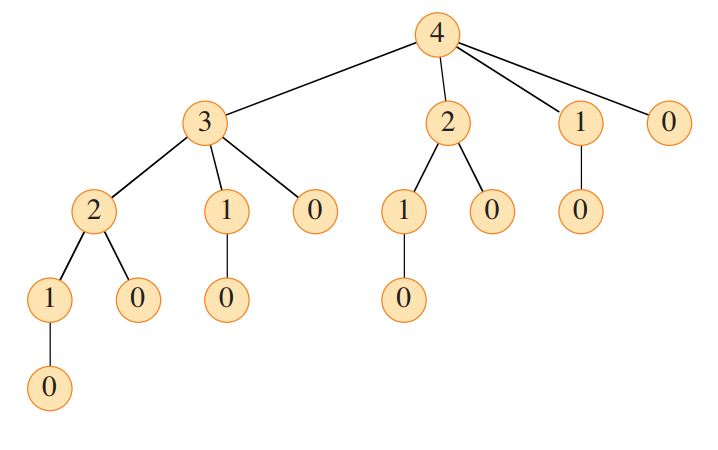

In [21]:
from IPython.display import Image
display(Image("img/rod_cut_recursion_tree.png", width=600))

Now instead of solving the same subproblem over and we can instead *store* the solution to a subproblem, in this case the optimal revenue one can get for a rod of length $n' < n$, in a hashtable and then when we come across that subproblem again we can retrieve this solution from the hashtable instead of recomputing a problem we've already solved.  This is called ***memoization*** and is the key distinction between dynamic programming versus divide & conquer approaches.

```{note}
:class: dropdown
Note this isn't a typo; it's actually spelled *memoization* and refers to the idea of memos since we store the value and look back at it later {cite:p}`cormen2022introduction`. In my opinion *memorization* would also work just as well since we are memorization the solution to a problem.
```

A more efficient version of the `naive_rod_cutting` algorithm, which utilizes memoization, is given below. This algorithm brings the time complexity from $O(2^n)$ to $O(n^2)$ so an exponential speedup! Although note that this comes with the cost of increasing the space complexity from $O(1)$ to $O(n)$ since we are storing a solution for each of the values of rod length that are $< n$.

In [22]:
def fast_rod_cutting(p, n, memo):
   if n in memo.keys(): # check memo to see if we've already solved this problem for this value of n
      max_rev = memo[n]
      return max_rev

   if n == 0: # if rod is length 0 terminate and get 0 revenue (recursive termination condition)
      return 0
    
   max_rev = float('-inf') # initially set revenue to lowest possible number
    
   for i in range(1, n+1): # loop over each possible first cut into two parts
      max_rev = max(max_rev, p[i] + fast_rod_cutting(p, n-i, memo))
   
   memo[n] = max_rev # save max revenue found for this value of n
    
   return max_rev

start_time = time.time()
memo = {} # for memoization 
print(f"Max revenue for rod of length {n} is:", fast_rod_cutting(p, n, memo))
print(f"Took {(time.time() - start_time):.3f} seconds")

Max revenue for rod of length 27 is: 541
Took 0.000 seconds


## $n$-th Fibonacci number

Here we'll go over a simpler example that demonstrates the power of dynamic programming: computing the $n$-th Fibonacci number.

The $n$-th Fibonacci number $F_n$ is defined as

$$
F_n = F_{n-1} + F_{n-2}
$$

where the $0$-th and $1$-st Fibonacci number are defined as $F_0=0$ and $F_1=1$ respectively. This has a clear, albeit naive, recursive implementation in code shown below.

In [23]:
"""
n: the n-th Fibonacci number desired
"""
def naive_fibonacci(n):
    if n == 0:
       return 0
    elif n == 1:
       return 1
    else:
       Fn = naive_fibonacci(n - 1) + naive_fibonacci(n - 2)
       return Fn
   
start_time = time.time()
n = 45
print(f"{n}-th Fibonacci number is: {naive_fibonacci(n)}")
print(f"Took {(time.time() - start_time):.3f} seconds")

45-th Fibonacci number is: 1134903170
Took 304.175 seconds


The implementation is naive because of the of the two recursive calls `naive_fibonacci(n - 1)` and `naive_fibonacci(n - 2)`. For example when $n=10$ the first recursive call computes $F_9$ and the second recursive call computes $F_8$. However to compute $F_9$ the first recursive call is going to need to compute $F_8$ but wait, $F_8$ is already being computed by the *second* recursive call. This means we're doing double the work! We can get around this by *storing* the solutions to smaller Fibonacci problems in a hashtable/dict that we have already computed and when we need to compute them again we can simply look them 

In [42]:
def fast_fibonacci_top_down(n, memo):
    if n in memo.keys():
       return memo[n]
    if n == 0:
       return 0
    elif n == 1:
       return 1
    else:
       Fn = fast_fibonacci_top_down(n - 1, memo) + fast_fibonacci_top_down(n - 2, memo)
       memo[n] = Fn
       return Fn

start_time = time.time()
memo = {} # for memoization 
print(f"{n}-th Fibonacci number is: {fast_fibonacci_top_down(n, memo)}")
print(f"Took {(time.time() - start_time):.3f} seconds")

45-th Fibonacci number is: 1134903170
Took 0.000 seconds


We can also solve this without memoization using the bottom-up approach of dynamic programming.

In [41]:
def fast_fibonacci_bottom_up(n):
    Fn_2 = 0 # F_{n-2}
    Fn_1 = 1 # F_{n-1}
    Fn = 0 # F_n
    for i in range(2, n+1):
        Fn = Fn_1  + Fn_2
        Fn_2 = Fn_1 
        Fn_1 = Fn
    
    return Fn

start_time = time.time()
print(f"{n}-th Fibonacci number is: {fast_fibonacci_bottom_up(n)}")
print(f"Took {(time.time() - start_time):.3f} seconds")

45-th Fibonacci number is: 1134903170
Took 0.000 seconds


This method has time complexity $O(n)$ but a space complexity of $O(1)$ since we do not utilize and array to store all $n$ solutions to smaller subproblems.

## Chain matrix multiplication  

Let's go over the second example of an application of dynamic programming which is covered extensively in {cite:p}`cormen2022introduction` and rather briefly in {cite:p}`dasgupta2008algorithms`. Suppose we have a chain of $n$ matrices  we want to multiply together

$$
P = A_1A_2A_3...A_n
$$
where matrix $A_1$ has shape $m_0\times m_1$ and matrix $A_2$ has shape $m_1\times m_2$ and so on. We would like to devise an algorithm to do this optimally. Optimally in what sense though? Matrix multiplication is not commutative, i.e. $AB \not =BA$ in general, so we can not swap the order of the matrices in the product. However, matrix multiplication is associative, i.e. $(AB)C=A(BC)$, so we can choose which of the two term products to compute before others. 

Recall that (naively) multiplying a $m\times n$ matrix with a $n\times p$ matrix has time complexity (which is measured in scalar multiplications) $O(mnp)$ which reduces to the familiar $O(n^3)$ for square matrices. Suppose we want to calculate $P=A_1A_2A_3$ where the corresponding shapes are $100 \times 20, 20 \times 200, 200 \times 15$ respectively. 

First let's find the complexity of computing 

$$
P=(A_1A_2)A_3.
$$ 

The product in parentheses has complexity $100 \times 20 \times 200 = 400,000$ and results in a $100 \times 200$ matrix. Then the complexity of multiplying this resulting matrix with $A_3$ is $100 \times 200 \times 15 = 300,000$ for a total complexity of $400,000+300,000=700,000$. 

Now what if we compute the product as 

$$
P=A_1(A_2A_3)?
$$ 

The product in parentheses has complexity $20 \times 200 \times 15 = 60,000$ and results in a $20 \times 15$ matrix. Then the complexity of multiplying this resulting matrix with $A_1$ is $100 \times 20 \times 15 = 30,000$ for a total complexity of $60,000+30,000=90,000$. From this we can see that choosing how to parenthesize the products can have a *drastic* effect on the complexity of the overall multi-matrix product computation. Can we devise an algorithm to find the *optimal* parenthesization given a list of matrix shapes that we want to multiply? Let's follow the steps laid out by {cite:p}`cormen2022introduction` for solving a dynamic programming problem.

### 1. Characterize the structure of an optimal solution (parenthesization)

Suppose that we have an optimal parenthesization for the $n$ matrix product $P_{\text{opt}}=A_1A_2A_3...A_n$. Now suppose we take this solution and split it into two chains at $A_k$ such that we have $P_{\text{opt}}^L=A_1A_2...A_k$ and $P_{\text{opt}}^R=A_{k+1}A_{k+2}...A_n$ and clearly $P_{\text{opt}} = P_{\text{opt}}^LP_{\text{opt}}^R$. Since we know $P_{\text{opt}}$ has an optimal parenthesization then we also know that the parenthesization of $P_{\text{opt}}^L$ is optimal. Why is this the case? Well if it wasn't the case and there was another parenthesization that was optimal for $P_{\text{opt}}^L$ then we can use that same parenthesization in the overall product in $P_{\text{opt}}=A_1A_2A_3...A_n$ to make it more optimal. But this is a contradiction since we stated at the beginning that $P_{\text{opt}}$ is already optimal. Therefore if $P_{\text{opt}}=A_1A_2A_3...A_n$ is an optimal parenthesization then the parenthesizations for sub-chains of the chain when considered in isolation must also be optimal. For example if $P_{\text{opt}}=(A_1(A_2(A_3A_4)))$ then $(A_2(A_3A_4))$ must also be an optimal parenthesization for the produce $A_2A_3A_4$. 

This ***partially*** goes in the other direction as well: an optimal solution to parenthesizing $A_1A_2A_3...A_n$ can be constructed by splitting the chain into two parts and finding optimal parenthesizing of the two resulting chains and multiplying them together (combining the solutions). The problem is that we do not know *which* split, i.e. splitting at $k=1$, $k=2$ etc, is optimal so we have to try all of them much like the rod cutting problem. But as with rod cutting we will find that we can exploit the repeated occurrence of subproblems to drastically cut down the number of computations we must perform.




```{note}
:class: dropdown
I say it partially goes in the other direction because in general it is not true that all splits can yield an optimal solution. For example if $(A(B(C(EF)G)))$ is an optimal parenthesization we can certainly find instance where the optimal parenthesization of $ABC$ is not an optimal parenthesization for the overall chain when multiplied by the optimal parenthesization of $EDF$.
```

### 2. Recursively define the value of an optimal solution

First for a problem of inputs size $n$, i.e. $P=A_1A_{2}...A_n$, we will define $A_{i:j}$ to be the matrix that results from computing $A_iA_{i+1}...A_j$ where $1\leq i \leq j \leq n$. We are given the dimensions of the matrices as a list $[m_0,m_1,...m_n]$ such that matrix $A_i$ is of shape $m_{i-1}\times m_i$. Let $s[i,j]$ be the minimum number of scalar multiplications needed to compute the matrix $A_{i:j}$ resulting from the chain $A_iA_{i+1}...A_j$. We want to find a parenthesization that results in $s[1,n]$ scalar multiplications since $s[1,n]$ the minimum number of scalar multiplications needed to compute the whole chain. There are 2 cases either

1) $i=j$ in which case we only have one matrix and the minimum number of scalar multiplications needed to compute it are 0 (we're not multiplying anything) so  $s[i,i]=0 \quad \forall i \in \{1,2,...,n\}$ 

$\qquad \qquad \qquad \Large{\textbf{or}}$

2) $i<j$ (we ignore cases where $i>j$ since they are covered) in which case we have the product $A_iA_{i+1}...A_j$ to compute. Suppose an optimal parenthesization splits the product at $A_k$ where $i \leq k < j$. Then $s[i,j]$ is equal to the minimum number of scalar multiplications to compute $A_{i:k}$, i.e. $s[i,k]$, plus the minimum number of scalar multiplications to compute $A_{k+1:j}$, i.e. $s[k+1,j]$, plus the number of scalar multiplications needed to multiply the two resulting matrices $A_{i:k}$ and $A_{k+1:j}$. The shape of $A_{i:k}$ will be $m_{i-1} \times m_k$ and the shape of $A_{k+1:j}$ will be $m_k \times m_j$ and so it will take $m_{i-1}m_km_j$ scalar multiplications to compute their product at a minimum. Thus we can express $s[i,j]$ as 

$$
s[i,j] = s[i,k] + s[k+1,j] + m_{i-1}m_km_j
$$

### Binary tree method
We can also solve this problem using a binary tree as laid out by {cite:p}`dasgupta2008algorithms` and lecture. 

## Longest increasing subsequence

This was the first problem covered in lecture. The problem can be state as follows. Given a sequence of numbers 

$$
L_n=a_1,a_2,...a_n
$$ 

how can we find the length of the longest increasing subsequence (LIS) which we will denote as $L_n^s$? A subsequence is any subset of this sequence that preservers the relative ordering of the elements in the original sequence. For example $a_1,a_2,a_3$ is a subsequence as is $a_3, a_4, a_7$. An increasing subsequence is a subsequence where each element $a_i$ is strictly greater than the previous term in the sequence so 

$$
a_i < a_{i+1} < ... < a_j.
$$

Thinking of this in terms of dynamic programming we may think to take the bottom-up approach and find the length of the LIS. That is we first find the length of the LIS for the smallest subproblem 

$$
L_1=a_1
$$ 
and then use that solution to compute the length of the LIS for the next largest subproblem 

$$
L_2=a_1,a_2
$$ 

and so on until we compute the length of the LIS for the full sequence $L_n$. Note that for the case of $L_1$ the solution is trivial: the LIS for a sequence with one element is always just that one element which has length $L_1^s=1$.

Let's use the specific example from lecture 

$$
L_{n=12} = 5,7,4,-3,9,1,10,4,5,8,9,3.
$$

So the smallest subproblem is $L_1=5$ for which the LIS is $5$ and the solution is thus $L_1^s=1$. The next smallest subproblem is $L_2=5,7$. Using the previous solution we can just check to see if the newly added element, $7$, is strictly greater than the last element in the LIS for the previous subproblem. If it is then we append that element to the end of the LIS for the previous subproblem and add $1$ to the solution of the previous problem. If it is not strictly greater then we simply use the solution from the previous subproblem as the solution to this subproblem. For the case of $L_2$, since $7>5$, the LIS is $5,7$ and thus $L_2^s=2$. The next smallest subproblem is $L_3=5,7,4$ and we simply do the same check as we did for the previous one. Since $4 \not > 5$ the solution to this subproblem is the same as the solution to $L_2$ i.e the LIS is $5,7$ and $L_3^s=2$. For $L_4=5,7,4,-3$ we get the same result. 

Suppose we continue this up until 
$$
L_{10}=5,7,4,-3,9,1,10,4,5,8.
$$

If we have been using the same procedure as before we will have found the solution to $L_9=5,7,4,-3,9,1,10,4,5$ to be $L_9^s=4$ with the LIS $5,7,9,10$. If we use this solution to construct our solution to $L_{10}$ using the same check as before we will deduce that the LIS is still $5,7,9,10$ and $L_{10}^s=4$. But this is ***wrong***. There is actually a longer LIS, i.e. $-3,1,4,5,8$, which has length $5$.

Clearly our approach is not optimal. We are either specifying the subproblems incorrectly or incorrectly combining their solutions to create solutions for larger subproblems. Let's think about how this went wrong. We now know the LIS for $L_{10}$ is 

$$
-3,1,4,5,8.
$$

For our initial procedure to have worked it would have had to find that the LIS for the previous subproblem $L_9$ was 

$$
-3,1,4,5.
$$ 

But this is not what our procedure finds the LIS to be. Our procedure finds that 

$$
5,7,9,10
$$

is the LIS for $L_9$. Notice that both of these LIS are of length 4 but the first is more optimal for solving subproblems down the road. This is because the first subsequence has a final element, $5$, which is smaller than the final element of the second subsequence, $10$, which allows for more options to append to the end of the subsequence when considering the next subproblem since there are more numbers that are larger than $5$ then there are numbers that are larger than $10$. 

 Which would then entail the LIS for the subproblem $L_8$ is $-3,1,4$. But this is not what our algorithm would have found for $L_8$. For $L_8$ our algorithm would have found the LIS was $5,7,9,10$ which is in fact a longer increasing subsequence than $-3,1,4,5$. Clearly this greedy approach does not work as there

## Longest common subsequence

## Knapsack

## Shortest paths

## Practice problems

### 6.1

### 6.2

### 6.4

### 6.8

### 6.18

### 6.19

### 6.20

### 6.26

In [25]:
%load_ext watermark
%watermark -n -u -v -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Aug 10 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

